In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:05<00:00, 30208984.74it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


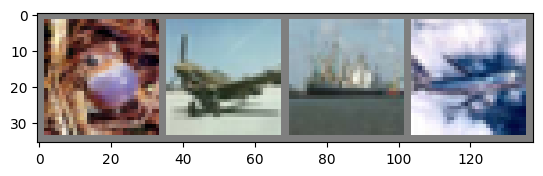

frog  plane ship  plane


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
images.shape

torch.Size([4, 3, 32, 32])

In [ ]:
labels

tensor([6, 0, 8, 0])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # self.conv1 = nn.Conv2d(3, 6, 5)
        # self.pool = nn.MaxPool2d(2, 2)
        # self.conv2 = nn.Conv2d(6, 16, 5)
        # self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # self.fc2 = nn.Linear(120, 84)
        # self.fc3 = nn.Linear(84, 10)

        self.conv1 = nn.Conv2d(3, 20, 3)  # First layer: 20 feature maps, 3x3 kernel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(20, 60, 2)  # Second layer: 60 feature maps, 2x2 kernel
        self.conv3 = nn.Conv2d(60, 60, 3)  # Third layer: 60 feature maps, 3x3 kernel
        self.fc1 = nn.Linear(60 * 2 * 2, 120)  # The dimension here is an example, need to be calculated based on the output of the last conv layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))  # Adding the third layer in forward pass
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
print(net)

Net(
  (conv1): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 60, kernel_size=(2, 2), stride=(1, 1))
  (conv3): Conv2d(60, 60, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=240, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
from torchvision import models
from torchsummary import summary

summary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 30, 30]             560
         MaxPool2d-2           [-1, 20, 15, 15]               0
            Conv2d-3           [-1, 60, 14, 14]           4,860
         MaxPool2d-4             [-1, 60, 7, 7]               0
            Conv2d-5             [-1, 60, 5, 5]          32,460
         MaxPool2d-6             [-1, 60, 2, 2]               0
            Linear-7                  [-1, 120]          28,920
            Linear-8                   [-1, 84]          10,164
            Linear-9                   [-1, 10]             850
Total params: 77,814
Trainable params: 77,814
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.30
Params size (MB): 0.30
Estimated Total Size (MB): 0.61
---------------------------------------------

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.295
[1,  4000] loss: 2.088
[1,  6000] loss: 1.840
[1,  8000] loss: 1.705
[1, 10000] loss: 1.609
[1, 12000] loss: 1.523
[2,  2000] loss: 1.412
[2,  4000] loss: 1.386
[2,  6000] loss: 1.340
[2,  8000] loss: 1.309
[2, 10000] loss: 1.270
[2, 12000] loss: 1.229
[3,  2000] loss: 1.134
[3,  4000] loss: 1.139
[3,  6000] loss: 1.127
[3,  8000] loss: 1.095
[3, 10000] loss: 1.093
[3, 12000] loss: 1.078
[4,  2000] loss: 0.979
[4,  4000] loss: 0.999
[4,  6000] loss: 0.972
[4,  8000] loss: 0.975
[4, 10000] loss: 0.959
[4, 12000] loss: 0.967
[5,  2000] loss: 0.875
[5,  4000] loss: 0.884
[5,  6000] loss: 0.900
[5,  8000] loss: 0.884
[5, 10000] loss: 0.877
[5, 12000] loss: 0.864
[6,  2000] loss: 0.786
[6,  4000] loss: 0.811
[6,  6000] loss: 0.797
[6,  8000] loss: 0.818
[6, 10000] loss: 0.810
[6, 12000] loss: 0.808
[7,  2000] loss: 0.748
[7,  4000] loss: 0.745
[7,  6000] loss: 0.721
[7,  8000] loss: 0.780
[7, 10000] loss: 0.757
[7, 12000] loss: 0.764
[8,  2000] loss: 0.677
[8,  4000] 

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  frog  plane ship  car  


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 70 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 73.5 %
Accuracy for class: car   is 87.5 %
Accuracy for class: bird  is 46.8 %
Accuracy for class: cat   is 48.2 %
Accuracy for class: deer  is 67.8 %
Accuracy for class: dog   is 55.8 %
Accuracy for class: frog  is 82.9 %
Accuracy for class: horse is 85.9 %
Accuracy for class: ship  is 80.6 %
Accuracy for class: truck is 75.6 %


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(device)

cpu
